In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
automobile_data_processed = pd.read_csv('datasets/automobile_data_processed.csv')
automobile_data_processed.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,8845.0
85,1,119.0,plymouth,gas,turbo,two,hatchback,fwd,front,93.7,...,98,spdi,3.03,3.39,7.6,102.0,5500.0,24,30,7957.0
120,0,91.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,8358.0
158,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0
35,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0


In [23]:
#a pairplot in Seaborn allows to quickly see how the different
#variables in the dataset are related to other variables
automobile_subset = automobile_data_processed[['horsepower', 'city-mpg',
                                                      'highway-mpg', 'price']]

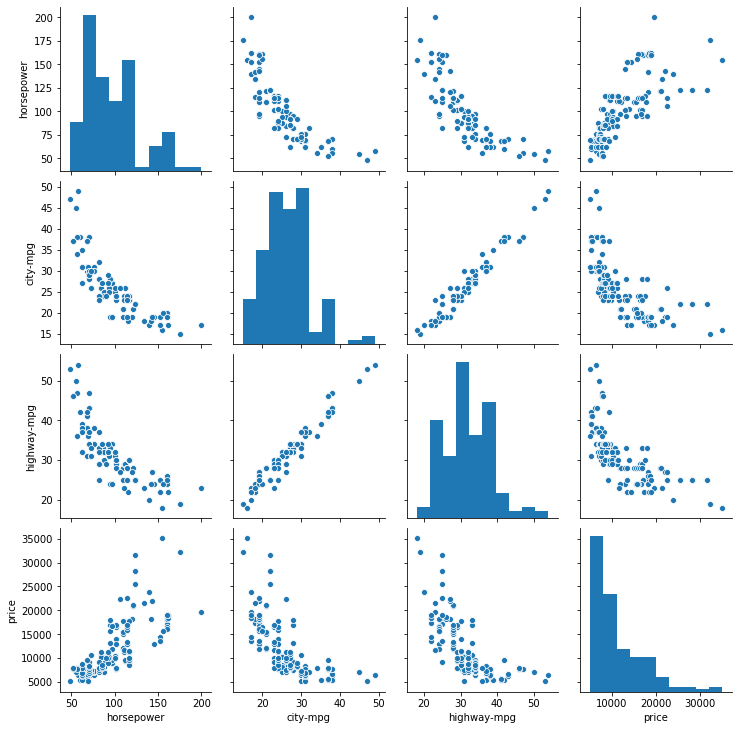

In [24]:
#default pairwise relationship as expressed in Seaborn, simply call sns.pairplot
#and pass in the entire dataset
sns.pairplot(automobile_subset)
plt.show()
#along the main diagonal, we have a histogram representation of the data
#because this correponds to just one variable; it's univariate data
#by default, the pairplot express all bivariate relationships in the form of a
#scater plot

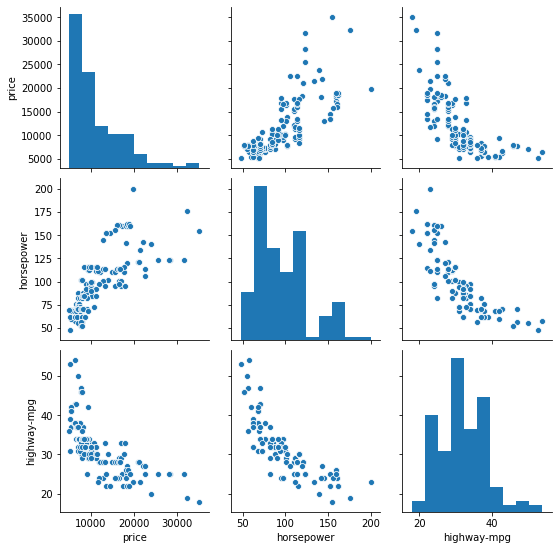

In [25]:
#if we have many features and want to view pairwise relationships for just
#a few of these variables, you can call the sns.pairplot and specify the vars
#input argument
sns.pairplot(automobile_data_processed,
            vars = ['price', 'horsepower', 'highway-mpg'])
plt.show()

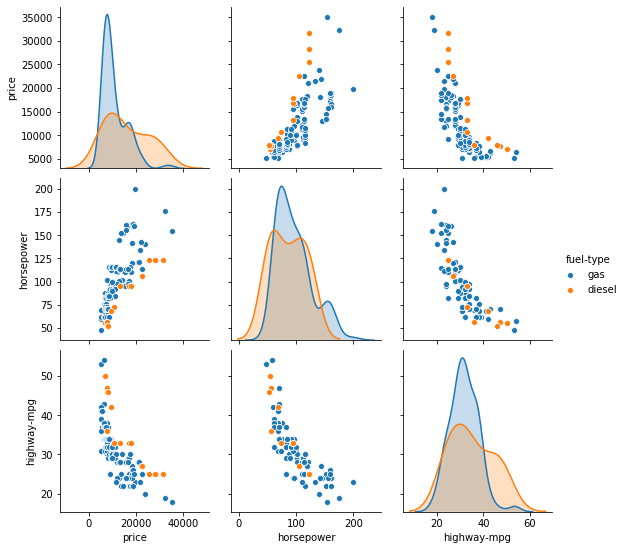

In [26]:
#let's say you wanted to show an additional dimension for each of your pairwise
#relationship, you can do so using the hue
sns.pairplot(automobile_data_processed,
            vars = ['price', 'horsepower', 'highway-mpg'], 
            hue = 'fuel-type')
plt.show()
#our univariate (diagonal) data has now been expressed using KDE curves

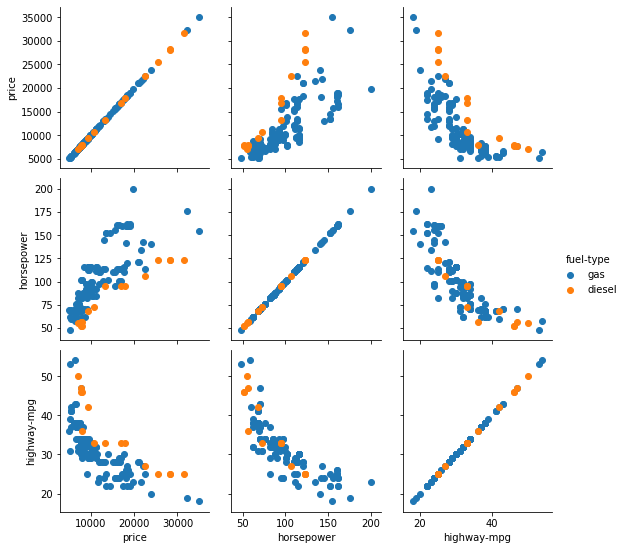

In [27]:
#these pairwise relationships can be customized in a very granular manner
#using the pairgrid object in seaborn
g = sns.PairGrid(automobile_data_processed,
            vars = ['price', 'horsepower', 'highway-mpg'], 
            hue = 'fuel-type')
#i've specified that I want all plots to be scatter plots
g.map(plt.scatter)
g.add_legend()
plt.show() 

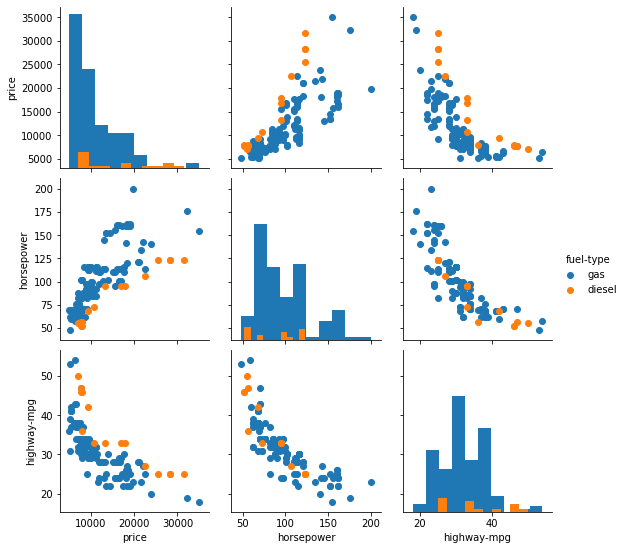

In [28]:
#let's add in some more customizations for our PairGrid
#instantiate the PairGid object as before
g = sns.PairGrid(automobile_data_processed,
            vars = ['price', 'horsepower', 'highway-mpg'], 
            hue = 'fuel-type')
#I want the main diagonal to be mapped using histograms 
g.map_diag(plt.hist)
#I want the off diagonal elements to be represented using scatter plots
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show() 

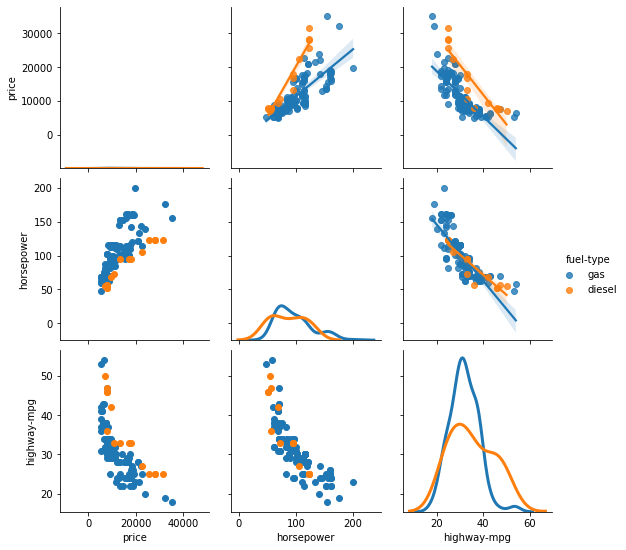

In [29]:
g = sns.PairGrid(automobile_data_processed,
            vars = ['price', 'horsepower', 'highway-mpg'], 
            hue = 'fuel-type')
#I want the lower portion of the PairGrid to have scatter plot representation
g.map_lower(plt.scatter)
#the diagonal should include teh KDE curve
g.map_diag(sns.kdeplot, lw = 3, legend = False)
#the upper portion of the pairwise relationship should be represented using regression plots
g.map_upper(sns.regplot)

g.add_legend()
plt.show() 

In [30]:
#let's take a look at correlation data using a Seaborn heatmap
automobile_corr = automobile_data_processed[['engine-size', 'horsepower',
                                            'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()
automobile_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


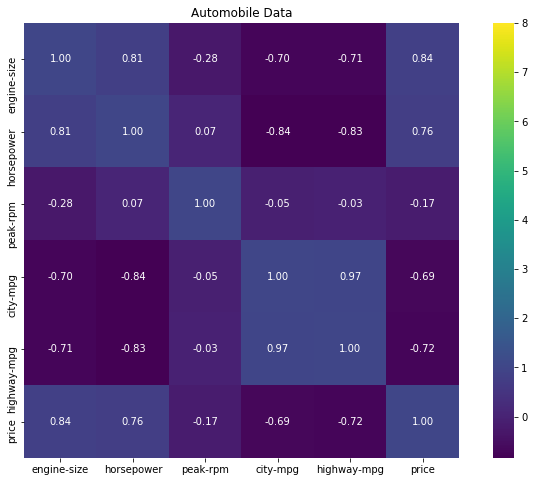

In [32]:
#let's now pass it into the sns.heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(automobile_corr, vmax = 8, square = True,
           annot = True, fmt = '.2f', cmap = 'viridis')
plt.title('Automobile Data')
plt.show()